# 1. Preparing Data

In [ ]:
'''another way of reading multiple csv files'''

# Import pandas
import pandas as pd

# Create the list of file names: filenames
filenames = ['Gold.csv', 'Silver.csv', 'Bronze.csv']

# Create the list of three DataFrames: dataframes
dataframes = []
for filename in filenames:
    dataframes.append(pd.read_csv(filename))

# Print top 5 rows of 1st DataFrame in dataframes
print(dataframes[0].head())

In [ ]:
'''combining totals'''
# Make a copy of gold: medals
medals = gold.copy()

# Create list of new column labels: new_labels
new_labels = ['NOC', 'Country', 'Gold']

# Rename the columns of medals using new_labels
medals.columns = new_labels

# Add columns 'Silver' & 'Bronze' to medals
medals['Silver'] = silver['Total']
medals['Bronze'] = bronze['Total']

# Print the head of medals
print(medals.head())

In [ ]:
'''Reindexing Values and sorting'''

# Read 'monthly_max_temp.csv' into a DataFrame: weather1
weather1 = pd.read_csv('monthly_max_temp.csv', index_col='Month')

# Sort the index of weather1 in alphabetical order: weather2
weather2 = weather1.sort_index()

# Sort the index of weather1 in reverse alphabetical order: weather3
weather3 = weather1.sort_index(ascending = False)

# Sort weather1 numerically using the values of 'Max TemperatureF': weather4
weather4 = weather1.sort_values('Max TemperatureF')


In [ ]:
'''reindexing from a list'''
# Reindex weather1 using the list year: weather2
weather2 = weather1.reindex(year)

# Reindex weather1 using the list year with forward-fill: weather3
weather3 = weather1.reindex(year).ffill() #ffill method forward-fills the null entries when upsampling. 

In [ ]:
'''Reindexing using another DataFrame Index'''
# Reindex names_1981 with index of names_1881: common_names
common_names = names_1981.reindex(names_1881.index)

# Drop rows with null counts: common_names
common_names = common_names.dropna()

In [ ]:
'''Broadcasting in arithmetic formulas'''

# Extract selected columns from weather as new DataFrame: temps_f
temps_f = weather[['Min TemperatureF','Mean TemperatureF','Max TemperatureF']]

# Convert temps_f to celsius: temps_c
temps_c = (temps_f - 32) * 5/9

# Rename 'F' in column names with 'C': temps_c.columns
temps_c.columns = temps_c.columns.str.replace('F', 'C')

In [ ]:
'''Computing percentage growth of GDP'''

# Read 'GDP.csv' into a DataFrame: gdp
gdp = pd.read_csv('GDP.csv', index_col='DATE', parse_dates=True)

# Slice all the gdp data from 2008 onward: post2008
post2008 = gdp['2008':]

# Print the last 8 rows of post2008
print(post2008.tail(8))

# Resample post2008 by year, keeping last(): yearly
yearly = post2008.resample('A').last()#A is for annual frequency | last is for taking last value of 

# Compute percentage growth of yearly: yearly['growth']
yearly['growth'] = yearly.pct_change() * 100

In [ ]:
'''Calculations from different dataframes'''

# Read 'sp500.csv' into a DataFrame: sp500
sp500 = pd.read_csv('sp500.csv', parse_dates= True, index_col = 'Date')

# Read 'exchange.csv' into a DataFrame: exchange
exchange = pd.read_csv('exchange.csv', parse_dates= True, index_col = 'Date')

# Subset 'Open' & 'Close' columns from sp500: dollars
dollars = sp500[['Open','Close']]

# Print the head of dollars
print(dollars.head())

# Convert dollars to pounds: pounds
pounds = dollars.multiply(exchange['GBP/USD'], axis = 'rows')

# Print the head of pounds
print(pounds.head())

## 2. Concatenating Data

In [ ]:
'''Appending pandas Series'''

# Import pandas
import pandas as pd

# Load 'sales-jan-2015.csv' into a DataFrame: jan
jan = pd.read_csv('sales-jan-2015.csv', index_col='Date', parse_dates=True)

# Load 'sales-feb-2015.csv' into a DataFrame: feb
feb = pd.read_csv('sales-feb-2015.csv', index_col='Date', parse_dates=True)

# Load 'sales-mar-2015.csv' into a DataFrame: mar
mar = pd.read_csv('sales-mar-2015.csv', index_col='Date', parse_dates=True)

# Extract the 'Units' column from jan: jan_units
jan_units = jan['Units']

# Extract the 'Units' column from feb: feb_units
feb_units = feb['Units']

# Extract the 'Units' column from mar: mar_units
mar_units = mar['Units']

# Append feb_units and then mar_units to jan_units: quarter1
quarter1 = jan_units.append(feb_units).append(mar_units)

# Print the first slice from quarter1
print(quarter1.loc['jan 27, 2015':'feb 2, 2015'])

# Print the second slice from quarter1
print(quarter1.loc['feb 26, 2015':'mar 7, 2015'])

# Compute & print total sales in quarter1
print(quarter1.sum())

In [ ]:
'''Concatenating pandas Series along row axis'''

# Initialize empty list: units
units = []

# Build the list of Series
for month in [jan, feb, mar]:
    units.append(month['Units'])

# Concatenate the list: quarter1
quarter1 = pd.concat(units)

# Print slices from quarter1
print(quarter1.loc['jan 27, 2015':'feb 2, 2015'])
print(quarter1.loc['feb 26, 2015':'mar 7, 2015'])

In [ ]:
'Appending DataFrames with ignore_index'

# Add 'year' column to names_1881 and names_1981
names_1881['year'] = 1881
names_1981['year'] = 1981

# Append names_1981 after names_1881 with ignore_index=True: combined_names
combined_names = names_1881.append(names_1891, ignore_index = True)

# Print shapes of names_1981, names_1881, and combined_names
print(names_1981.shape)
print(names_1881.shape)
print(combined_names.shape)

'''In [6]: print(names_1981.shape)
(19455, 4)

In [7]: print(names_1881.shape)
(1935, 4)

In [8]: print(combined_names.shape)
(21390, 4)'''

# Print all rows that contain the name 'Morgan'
print(combined_names[combined_names['name'] == 'Morgan'])

In [ ]:
'''Concatenating pandas DataFrames along column axis'''

# Create a list of weather_max and weather_mean
weather_list = [weather_max,weather_mean]

# Concatenate weather_list horizontally
weather = pd.concat(weather_list, axis = 1)

'''Max TemperatureF
Month                  
Jan                  68
Apr                  89
Jul                  91
Oct                  84'''

'''Mean TemperatureF
Month                   
Apr            53.100000
Aug            70.000000
Dec            34.935484
Feb            28.714286
Jan            32.354839
Jul            72.870968
Jun            70.133333
Mar            35.000000
May            62.612903
Nov            39.800000
Oct            55.451613
Sep            63.766667'''

'''Max TemperatureF  Mean TemperatureF
Apr              89.0          53.100000
Aug               NaN          70.000000
Dec               NaN          34.935484
Feb               NaN          28.714286
Jan              68.0          32.354839
Jul              91.0          72.870968
Jun               NaN          70.133333
Mar               NaN          35.000000
May               NaN          62.612903
Nov               NaN          39.800000
Oct              84.0          55.451613
Sep               NaN          63.766667'''

In [ ]:
'''Building Dfs from multiple data files'''

#Initialize an empyy list: medals
medals =[] #[gold,silver,bronze]

for medal in medal_types:
    # Create the file name: file_name
    file_name = "%s_top5.csv" % medal
    # Create list of column names: columns
    columns = ['Country', medal]
    # Read file_name into a DataFrame: medal_df
    medal_df = pd.read_csv(file_name, header = 0, index_col = 'Country', names = columns)
    # Append medal_df to medals
    medals.append(medal_df)

# Concatenate medals horizontally: medals_df
medals_df = pd.concat(medals, axis = 'columns')
'''axis = 0,does one on top of other, axis = 1/columns does one besides the other'''
# Print medals_df
print(medals_df)

In [ ]:
'''Concatenating vertically to get MultiIndexed rows'''

for medal in medal_types:

    file_name = "%s_top5.csv" % medal

    # Read file_name into a DataFrame: medal_df
    medal_df = pd.read_csv(file_name, index_col='Country')
    
    # Append medal_df to medals
    medals.append(medal_df)

#Concatenate without keys

medals = pd.concat(medals)

'''                 Total
Country               
United States   1052.0
Soviet Union     584.0
United Kingdom   505.0
France           475.0
Germany          454.0
United States   1195.0
Soviet Union     627.0
United Kingdom   591.0
France           461.0
Italy            394.0
United States   2088.0
Soviet Union     838.0
United Kingdom   498.0
Italy            460.0
Germany          407.0'''
    
# Concatenate medals: medals
medals = pd.concat(medals, keys=['bronze', 'silver', 'gold'])

'''                       Total
       Country               
bronze United States   1052.0
       Soviet Union     584.0
       United Kingdom   505.0
       France           475.0
       Germany          454.0
silver United States   1195.0
       Soviet Union     627.0
       United Kingdom   591.0
       France           461.0
       Italy            394.0
gold   United States   2088.0
       Soviet Union     838.0
       United Kingdom   498.0
       Italy            460.0
       Germany          407.0
'''

# Print medals in entirety
print(medals)

In [ ]:
'''Slicing MultiIndexed DataFrames'''


# Sort the entries of medals: medals_sorted
medals_sorted = medals.sort_index(level = 0)

# Print the number of Bronze medals won by Germany
print(medals_sorted.loc[('bronze','Germany')])

# Print data about silver medals
print(medals_sorted.loc['silver'])

# Create alias for pd.IndexSlice: idx
idx = pd.IndexSlice

# Print all the data on medals won by the United Kingdom
print(medals_sorted.loc[idx[:,'United Kingdom'],:])

In [ ]:
'''Concatenating horizontally to get MultiIndexed columns'''

# Concatenate dataframes: february
february = pd.concat(dataframes, keys=['Hardware','Software','Service'], axis=1)
'''here columns have dual index'''

# Print february.info()
print(february.info())

# Assign pd.IndexSlice: idx
idx = pd.IndexSlice

# Create the slice: slice_2_8
slice_2_8 = february.loc['2015-2-2':'2015-2-8', idx[:,'Company']]

# Print slice_2_8
print(slice_2_8)

In [ ]:
'''Concatenating DataFrames from a dict'''

# Make the list of tuples: month_list
month_list = [('january', jan), ('february', feb), ('march', mar)]

'''[('january',                    Date          Company   Product  Units
  0   2015-01-21 19:13:21        Streeplex  Hardware     11
...),
 ('february',                    Date          Company   Product  Units
  0   2015-02-26 08:57:45        Streeplex   Service      4
...
  19  2015-02-21 20:41:47            Hooli  Hardware      3),
 ('march',                    Date          Company   Product  Units
  0   2015-03-22 14:42:25        Mediacore  Software      6
...
  19  2015-03-13 16:25:24        Streeplex  Software      9)]'''

# Create an empty dictionary: month_dict
month_dict = {}

for month_name, month_data in month_list:

    # Group month_data: month_dict[month_name]
    month_dict[month_name] = month_data.groupby('Company').sum()
    
month_dict

'''{'february':                  Units
 Company               
 Acme Coporation     34
 Hooli               30
 Initech             30
 Mediacore           45
 Streeplex           37, 'january':                  Units
 Company               
 Acme Coporation     76
 Hooli               70
 Initech             37
 Mediacore           15
 Streeplex           50, 'march':                  Units
 Company               
 Acme Coporation      5
 Hooli               37
 Initech             68
 Mediacore           68
 Streeplex           40}'''

# Concatenate data in month_dict: sales
sales = pd.concat(month_dict)

# Print sales
print(sales)

'''                         Units
         Company               
february Acme Coporation     34
         Hooli               30
         Initech             30
         Mediacore           45
         Streeplex           37
january  Acme Coporation     76
         Hooli               70
         Initech             37
         Mediacore           15
         Streeplex           50
march    Acme Coporation      5
         Hooli               37
         Initech             68
         Mediacore           68
         Streeplex           40'''

# Print all sales by Mediacore
idx = pd.IndexSlice
print(sales.loc[idx[:, 'Mediacore'], :])

'''                    Units
         Company         
february Mediacore     45
january  Mediacore     15
march    Mediacore     68'''

In [ ]:
'''Concatenating DataFrames with inner join'''

# Create the list of DataFrames: medal_list
medal_list = [bronze, silver, gold]

# Concatenate medal_list horizontally using an inner join: medals
medals = pd.concat(medal_list, keys=['bronze', 'silver', 'gold'], axis=0)

'''                        Total
       Country               
bronze United States   1052.0
       Soviet Union     584.0
       United Kingdom   505.0
       France           475.0
       Germany          454.0
silver United States   1195.0
       Soviet Union     627.0
       United Kingdom   591.0
       France           461.0
       Italy            394.0
gold   United States   2088.0
       Soviet Union     838.0
       United Kingdom   498.0
       Italy            460.0
       Germany          407.0'''

medals = pd.concat(medal_list, keys=['bronze', 'silver', 'gold'], axis=1)
'''                bronze  silver    gold
                 Total   Total   Total
France           475.0   461.0     NaN
Germany          454.0     NaN   407.0
Italy              NaN   394.0   460.0
Soviet Union     584.0   627.0   838.0
United Kingdom   505.0   591.0   498.0
United States   1052.0  1195.0  2088.0'''

medals = pd.concat(medal_list, keys=['bronze', 'silver', 'gold'], axis=1, join='inner')

'''bronze  silver    gold
                 Total   Total   Total
Country                               
United States   1052.0  1195.0  2088.0
Soviet Union     584.0   627.0   838.0
United Kingdom   505.0   591.0   498.0'''

# Print medals
print(medals)

In [ ]:
'''Resampling & concatenating DataFrames with inner join'''

# Resample and tidy china: china_annual
china_annual = china.resample('A').last().pct_change(10).dropna()

# Resample and tidy us: us_annual
us_annual = us.resample('A').last().pct_change(10).dropna()

# Concatenate china_annual and us_annual: gdp
gdp = pd.concat([china_annual, us_annual], axis=1, join='inner')

# Resample gdp and print
print(gdp.resample('10A').last())#10A is 10 year sample

'''               China        US
Year                          
1971-12-31  0.988860  1.052270
1981-12-31  0.972048  1.750922
1991-12-31  0.962528  0.912380
2001-12-31  2.492511  0.704219
2011-12-31  4.623958  0.475082
2021-12-31  3.789936  0.361780
'''

# 3. Merging Data


Screen Shot 2020-05-28 at 3.21.30 PM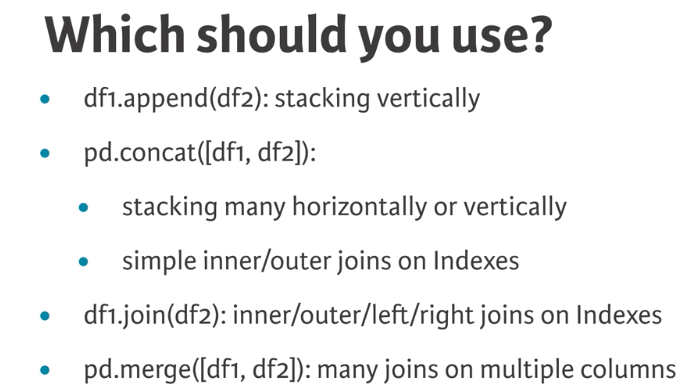

In [ ]:
'''Merging on a specific column'''

# Merge revenue with managers on 'city': merge_by_city
merge_by_city = pd.merge(revenue, managers, on='city')

# Print merge_by_city
print(merge_by_city)

# Merge revenue with managers on 'branch_id': merge_by_id
merge_by_id = pd.merge(revenue, managers, on='branch_id')

# Print merge_by_id
print(merge_by_id)

In [ ]:
'''Merging on columns with non-matching labels'''
# Merge revenue & managers on 'city' & 'branch': combined
combined = pd.merge(revenue, managers, left_on='city', right_on='branch')


In [ ]:
'''Merging on multiple columns'''
# Merge revenue & managers on 'branch_id', 'city', & 'state': combined
combined = pd.merge(revenue, managers, on=['branch_id', 'city', 'state'])

In [ ]:
'''Left & right merging on multiple columns'''
# Merge revenue and sales: revenue_and_sales
revenue_and_sales = pd.merge(revenue, sales, on=['city','state'], how='right')

# Print revenue_and_sales
print(revenue_and_sales)

# Merge sales and managers: sales_and_managers
sales_and_managers = pd.merge(sales, managers, left_on=['city','state'], right_on=['branch','state'], how='left')

In [ ]:
'''Merging DataFrames with outer join'''

# Perform the first merge: merge_default
merge_default = pd.merge(sales_and_managers, revenue_and_sales)

# Perform the second merge: merge_outer
merge_outer = pd.merge(sales_and_managers, revenue_and_sales, how='outer')

# Perform the third merge: merge_outer_on
merge_outer_on = pd.merge(sales_and_managers, revenue_and_sales, on=['city','state'], how='outer')


In [ ]:
'''Using Merge Ordered'''

austin
        date ratings
0 2016-01-01  Cloudy
1 2016-02-08  Cloudy
2 2016-01-17   Sunny

houston
        date ratings
0 2016-01-04   Rainy
1 2016-01-01  Cloudy
2 2016-03-01   Sunny

In [1]: tx_weather = pd.merge_ordered(austin, houston)

In [2]: print(tx_weather)
        date ratings
0 2016-01-01  Cloudy
1 2016-01-04   Rainy
2 2016-01-17   Sunny
3 2016-02-08  Cloudy
4 2016-03-01   Sunny

In [3]: tx_weather_suff = pd.merge_ordered(austin, houston, on='date', suffixes=['_aus', '_hus'])

In [4]: print(tx_weather_suff)
        date ratings_aus ratings_hus
0 2016-01-01      Cloudy      Cloudy
1 2016-01-04         NaN       Rainy
2 2016-01-17       Sunny         NaN
3 2016-02-08      Cloudy         NaN
4 2016-03-01         NaN       Sunny

In [5]: tx_weather_ffill = pd.merge_ordered(austin, houston, on='date', fill_method='ffill', suffixes=['_aus', '_hus'])
#ffill fills with most recent value in time-series
In [6]: print(tx_weather_ffill)
        date ratings_aus ratings_hus
0 2016-01-01      Cloudy      Cloudy
1 2016-01-04      Cloudy       Rainy
2 2016-01-17       Sunny       Rainy
3 2016-02-08      Cloudy       Rainy
4 2016-03-01      Cloudy       Sunny

In [ ]:
# Merge auto and oil: merged
merged = pd.merge_asof(auto, oil, left_on='yr', right_on='Date')

'''the pd.merge_asof() function will also merge values in order 
using the on column, but for each row in the left DataFrame, 
only rows from the right DataFrame whose 'on' 
column values are less than the left value will be kept.'''

# Print the tail of merged
print(merged.tail())

# Resample merged: yearly
yearly = merged.resample('A',on='Date')[['mpg','Price']].mean()

# Print yearly
print(yearly)

# Print yearly.corr()
print(yearly.corr())

# 4. CASE STUDY - SUMMER OLYMPICS

In [ ]:
'''Loading The Dataset'''

#Import pandas
import pandas as pd

# Create file path: file_path
file_path = 'Summer Olympic medallists 1896 to 2008 - EDITIONS.tsv'

# Load DataFrame from file_path: editions
editions = pd.read_csv(file_path, sep = '\t')

# Extract the relevant columns: editions
editions = editions[['Edition', 'Grand Total', 'City','Country']]

# Print editions DataFrame
print(editions)

In [ ]:
'''Loading NOC Codes'''


# Import pandas
import pandas as pd

# Create the file path: file_path
file_path = 'Summer Olympic medallists 1896 to 2008 - IOC COUNTRY CODES.csv'

# Load DataFrame from file_path: ioc_codes
ioc_codes = pd.read_csv(file_path)

# Extract the relevant columns: ioc_codes
ioc_codes = ioc_codes[['Country','NOC']]

# Print first and last 5 rows of ioc_codes
print(ioc_codes.head())
print(ioc_codes.tail())

In [ ]:
'''Building a Medals Dataframe'''

# Import pandas
import pandas as pd

# Create empty dictionary: medals_dict
medals_dict = {}

for year in editions['Edition']:

    # Create the file path: file_path
    file_path = 'summer_{:d}.csv'.format(year)
    
    # Load file_path into a DataFrame: medals_dict[year]
    medals_dict[year] = pd.read_csv(file_path)
    
    # Extract relevant columns: medals_dict[year]
    medals_dict[year] = medals_dict[year][['Athlete','NOC','Medal']]
    
    # Assign year to column 'Edition' of medals_dict
    medals_dict[year]['Edition'] = year
    
# Concatenate medals_dict: medals
medals = pd.concat(medals_dict,ignore_index=True)

# Print first and last 5 rows of medals
print(medals.head())
print(medals.tail())

In [ ]:
'''Counting medals by country/edition in a pivot table'''

# Construct the pivot_table: medal_counts
medal_counts = medals.pivot_table(values = "Athlete",index = "Edition",columns = 'NOC',aggfunc='count')

# Print the first & last 5 rows of medal_counts
print(medal_counts.head())
print(medal_counts.tail())

In [ ]:
'''Computing fraction of medals per Olympic edition'''


# Set Index of editions: totals
totals = editions.set_index('Edition')

# Reassign totals['Grand Total']: totals
totals = totals['Grand Total']

# Divide medal_counts by totals: fractions
fractions = medal_counts.divide(totals,axis = 'rows')

# Print first & last 5 rows of fractions
print(fractions.head())
print(fractions.tail())

In [ ]:
'''Computing percentage change in fraction of medals won'''
# Apply the expanding mean: mean_fractions
mean_fractions = fractions.expanding().mean()

'''It is the value of the mean with all the data available up to that point in time.'''

# Compute the percentage change: fractions_change
fractions_change = mean_fractions.pct_change()*100

# Reset the index of fractions_change: fractions_change
fractions_change = fractions_change.reset_index()

# Print first & last 5 rows of fractions_change
print(fractions_change.head())
print(fractions_change.tail())


In [ ]:
'''Building hosts DataFrame'''
# Import pandas
import pandas as pd

# Left join editions and ioc_codes: hosts
hosts = pd.merge(editions,ioc_codes,how = 'left')

# Extract relevant columns and set index: hosts
hosts = hosts[['Edition','NOC']].set_index('Edition')

# Fix missing 'NOC' values of hosts
print(hosts.loc[hosts.NOC.isnull()])
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

# Reset Index of hosts: hosts
hosts = hosts.reset_index()

# Print hosts
print(hosts)

In [ ]:
'''Reshaping for analysis'''
# Import pandas
import pandas as pd

# Reshape fractions_change: reshaped
reshaped = pd.melt(fractions_change, id_vars = 'Edition',value_name = 'Change')

''''id_vars' = Column_Name and value_name column name given to values in the
pivot table that become columsn in reshaped '''

# Print reshaped.shape and fractions_change.shape
print(reshaped.shape, fractions_change.shape)

# Extract rows from reshaped where 'NOC' == 'CHN': chn
chn = reshaped[reshaped['NOC'] == 'CHN']

# Print last 5 rows of chn with .tail()
print(chn.tail())


In [ ]:
'''Merging to compute influence'''

# Import pandas
import pandas as pd

# Merge reshaped and hosts: merged
merged = pd.merge(reshaped, hosts)

# Print first 5 rows of merged
print(merged.head())

# Set Index of merged and sort it: influence
influence = merged.set_index('Edition').sort_index()

# Print first 5 rows of influence
print(influence.head())

In [ ]:
'''Plotting influence of host country'''

# Import pyplot
import matplotlib.pyplot as plt

# Extract influence['Change']: change
change = influence['Change']

# Make bar plot of change: ax
ax = change.plot(kind='bar')

# Customize the plot to improve readability
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(editions['City'])

# Display the plot
plt.show()